In [112]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import json

In [113]:
d_path = 'D:/ANGELU/SMA/vlbi_cal'
cal_json = '*_cal_solutions.json'
_2017_cal_files = glob.glob(d_path + '/2017/' + cal_json, recursive=True)
_2018_cal_files = glob.glob(d_path + '/2018/' + cal_json, recursive=True)
_2020_cal_files = glob.glob(d_path + '/2020/' + cal_json, recursive=True)
_2021_cal_files = glob.glob(d_path + '/2021/' + cal_json, recursive=True)
_2022_cal_files = glob.glob(d_path + '/2022/' + cal_json, recursive=True)
_2023_cal_files = glob.glob(d_path + '/2023/' + cal_json, recursive=True)
_2024_cal_files = glob.glob(d_path + '/2024/' + cal_json, recursive=True)

In [114]:
_all_cal_files = glob.glob(d_path + '/**/' + cal_json, recursive=True)

In [115]:
# Test block to get all calibration solution values in one go

kp = []
ki = []
kd = []

for files in _2017_cal_files:
    _2017_cals = open(files)
    _2017_cals = json.load(_2017_cals)
    
    kp.append(_2017_cals['best_cal_solutions']['kp'])
    ki.append(_2017_cals['best_cal_solutions']['ki'])
    kd.append(_2017_cals['best_cal_solutions']['kd'])

In [136]:
def get_cal_solutions(_cal_files):
    """
    Get kp, ki, kd solution values from json file that contains all best calibration solution values
    """
    kp = []
    ki = []
    kd = []
    
    for files in _cal_files:
        _cals = open(files)
        _cals = json.load(_cals)
        
        kp.append(_cals['best_cal_solutions']['kp'])
        ki.append(_cals['best_cal_solutions']['ki'])
        kd.append(_cals['best_cal_solutions']['kd'])
    
    return np.array(kp), np.array(ki), np.array(kd)

In [137]:
_2017_kp, _2017_ki, _2017_kd = get_cal_solutions(_2017_cal_files)
_2018_kp, _2018_ki, _2018_kd = get_cal_solutions(_2018_cal_files)
_2020_kp, _2020_ki, _2020_kd = get_cal_solutions(_2020_cal_files)
_2021_kp, _2021_ki, _2021_kd = get_cal_solutions(_2021_cal_files)
_2022_kp, _2022_ki, _2022_kd = get_cal_solutions(_2022_cal_files)
_2023_kp, _2023_ki, _2023_kd = get_cal_solutions(_2023_cal_files)
_2024_kp, _2024_ki, _2024_kd = get_cal_solutions(_2024_cal_files)

In [138]:
_all_kp, _all_ki, _all_kd = get_cal_solutions(_all_cal_files)

### k_i cutoffs

In [332]:
_2017_mask = _2017_ki >= 0
_2017_sub_kp = _2017_kp[_2017_mask]
_2017_sub_ki = _2017_ki[_2017_mask]
_2017_sub_kd = _2017_kd[_2017_mask]

In [333]:
_2018_mask = _2018_ki >= 0
_2018_sub_kp = _2018_kp[_2018_mask]
_2018_sub_ki = _2018_ki[_2018_mask]
_2018_sub_kd = _2018_kd[_2018_mask]

In [334]:
_2020_mask = _2020_ki >= 0
_2020_sub_kp = _2020_kp[_2020_mask]
_2020_sub_ki = _2020_ki[_2020_mask]
_2020_sub_kd = _2020_kd[_2020_mask]

In [335]:
_2021_mask = _2021_ki >= 0
_2021_sub_kp = _2021_kp[_2021_mask]
_2021_sub_ki = _2021_ki[_2021_mask]
_2021_sub_kd = _2021_kd[_2021_mask]

In [336]:
_2022_mask = _2022_ki >= 0
_2022_sub_kp = _2022_kp[_2022_mask]
_2022_sub_ki = _2022_ki[_2022_mask]
_2022_sub_kd = _2022_kd[_2022_mask]

In [337]:
_2023_mask = _2023_ki >= 0
_2023_sub_kp = _2023_kp[_2023_mask]
_2023_sub_ki = _2023_ki[_2023_mask]
_2023_sub_kd = _2023_kd[_2023_mask]

In [338]:
_2024_mask = _2024_ki >= 0
_2024_sub_kp = _2024_kp[_2023_mask]
_2024_sub_ki = _2024_ki[_2023_mask]
_2024_sub_kd = _2024_kd[_2023_mask]

In [339]:
_all_mask = _all_ki >= 0
_all_sub_kp = _all_kp[_all_mask]
_all_sub_ki = _all_ki[_all_mask]
_all_sub_kd = _all_kd[_all_mask]

# 

## k_d vs k_i

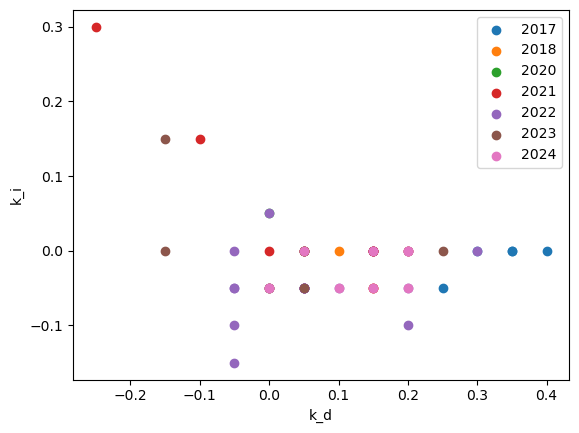

In [139]:
plt.scatter(_2017_kd, _2017_ki, label='2017')
plt.scatter(_2018_kd, _2018_ki, label='2018')
plt.scatter(_2020_kd, _2020_ki, label='2020')
plt.scatter(_2021_kd, _2021_ki, label='2021')
plt.scatter(_2022_kd, _2022_ki, label='2022')
plt.scatter(_2023_kd, _2023_ki, label='2023')
plt.scatter(_2024_kd, _2024_ki, label='2024')
plt.xlabel('k_d')
plt.ylabel('k_i')
plt.legend()
plt.savefig('all_years_dvi.png', dpi=300)
plt.show()

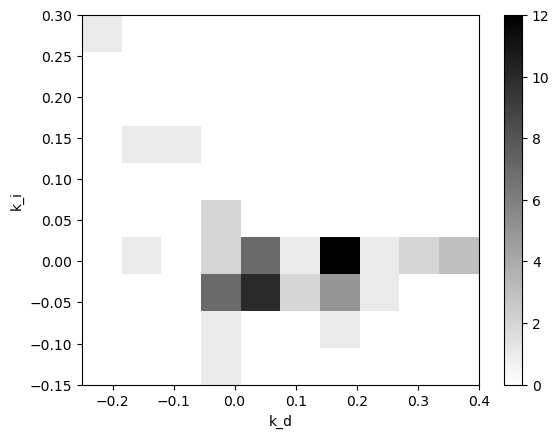

In [140]:
plt.hist2d(_all_kd, _all_ki, cmap='binary')
plt.xlabel('k_d')
plt.ylabel('k_i')
plt.colorbar()
plt.savefig('all_years_dvi_hist.png', dpi=300)
plt.show()

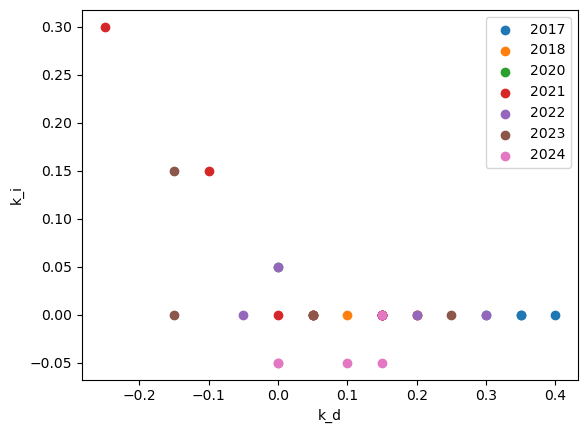

In [346]:
plt.scatter(_2017_sub_kd, _2017_sub_ki, label='2017')
plt.scatter(_2018_sub_kd, _2018_sub_ki, label='2018')
plt.scatter(_2020_sub_kd, _2020_sub_ki, label='2020')
plt.scatter(_2021_sub_kd, _2021_sub_ki, label='2021')
plt.scatter(_2022_sub_kd, _2022_sub_ki, label='2022')
plt.scatter(_2023_sub_kd, _2023_sub_ki, label='2023')
plt.scatter(_2024_sub_kd, _2024_sub_ki, label='2024')
plt.xlabel('k_d')
plt.ylabel('k_i')
plt.legend()
plt.savefig('all_years_sub_dvi.png', dpi=300)
plt.show()

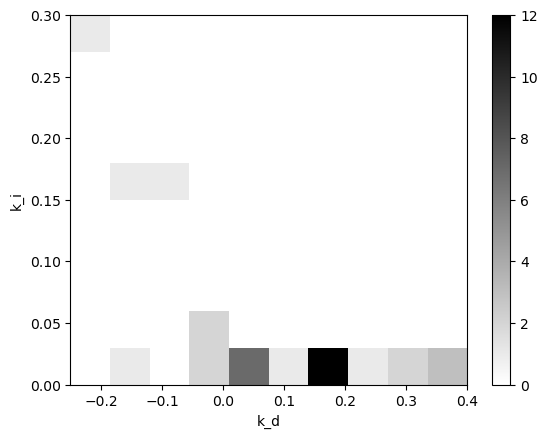

In [347]:
plt.hist2d(_all_sub_kd, _all_sub_ki, cmap='binary')
plt.xlabel('k_d')
plt.ylabel('k_i')
plt.colorbar()
plt.savefig('all_years_sub_dvi_hist.png', dpi=300)
plt.show()

##

#

## k_d vs k_p

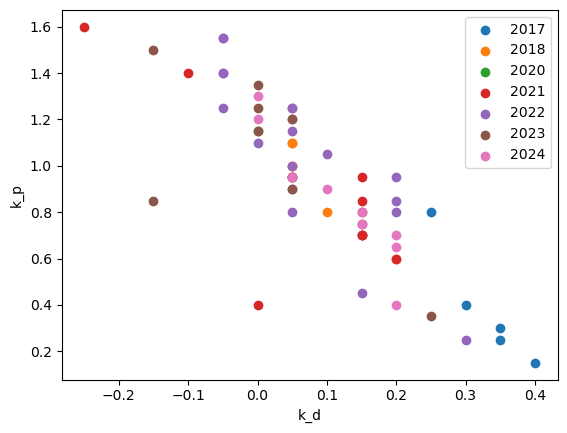

In [193]:
plt.scatter(_2017_kd, _2017_kp, label='2017')
plt.scatter(_2018_kd, _2018_kp, label='2018')
plt.scatter(_2020_kd, _2020_kp, label='2020')
plt.scatter(_2021_kd, _2021_kp, label='2021')
plt.scatter(_2022_kd, _2022_kp, label='2022')
plt.scatter(_2023_kd, _2023_kp, label='2023')
plt.scatter(_2024_kd, _2024_kp, label='2024')
plt.xlabel('k_d')
plt.ylabel('k_p')
plt.legend()
plt.savefig('all_years_dvp.png', dpi=300)
plt.show()

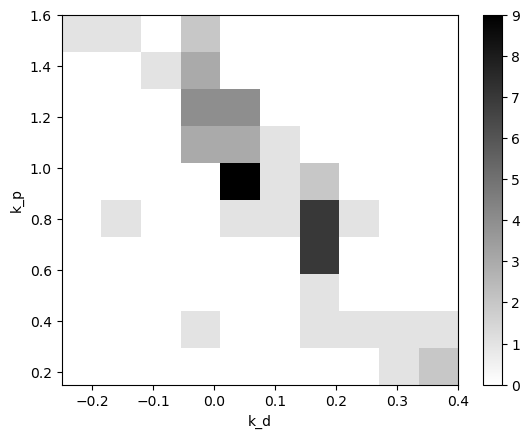

In [194]:
plt.hist2d(_all_kd, _all_kp, cmap='binary')
plt.xlabel('k_d')
plt.ylabel('k_p')
plt.colorbar()
plt.savefig('all_years_dvp_hist.png', dpi=300)
plt.show()

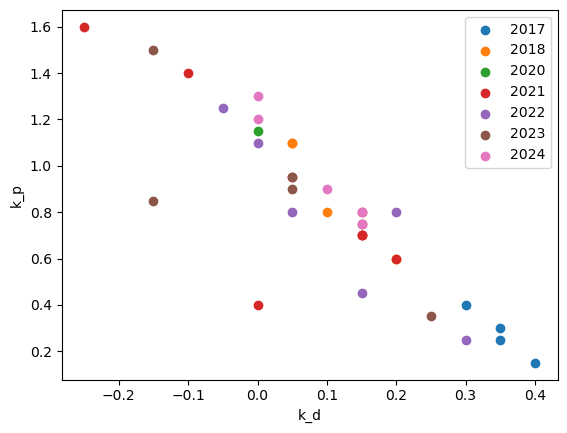

In [342]:
plt.scatter(_2017_sub_kd, _2017_sub_kp, label='2017')
plt.scatter(_2018_sub_kd, _2018_sub_kp, label='2018')
plt.scatter(_2020_sub_kd, _2020_sub_kp, label='2020')
plt.scatter(_2021_sub_kd, _2021_sub_kp, label='2021')
plt.scatter(_2022_sub_kd, _2022_sub_kp, label='2022')
plt.scatter(_2023_sub_kd, _2023_sub_kp, label='2023')
plt.scatter(_2024_sub_kd, _2024_sub_kp, label='2024')
plt.xlabel('k_d')
plt.ylabel('k_p')
plt.legend()
plt.savefig('all_years_sub_dvp.png', dpi=300)
plt.show()

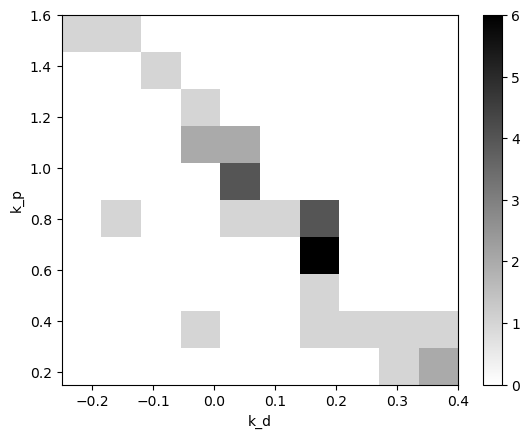

In [343]:
plt.hist2d(_all_sub_kd, _all_sub_kp, cmap='binary')
plt.xlabel('k_d')
plt.ylabel('k_p')
plt.colorbar()
plt.savefig('all_years_sub_dvp_hist.png', dpi=300)
plt.show()

#

## k_i vs k_p

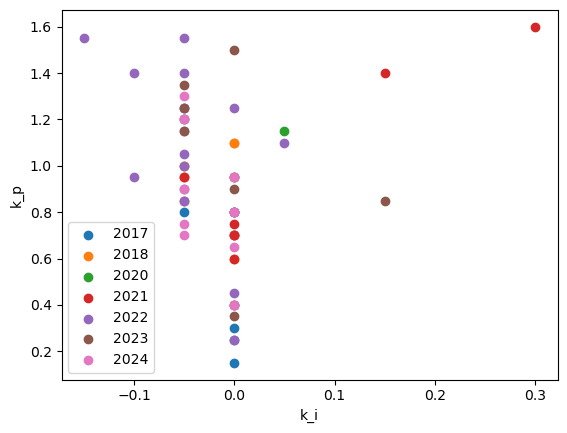

In [195]:
plt.scatter(_2017_ki, _2017_kp, label='2017')
plt.scatter(_2018_ki, _2018_kp, label='2018')
plt.scatter(_2020_ki, _2020_kp, label='2020')
plt.scatter(_2021_ki, _2021_kp, label='2021')
plt.scatter(_2022_ki, _2022_kp, label='2022')
plt.scatter(_2023_ki, _2023_kp, label='2023')
plt.scatter(_2024_ki, _2024_kp, label='2024')
plt.xlabel('k_i')
plt.ylabel('k_p')
plt.legend()
plt.savefig('all_years_ivp.png', dpi=300)
plt.show()

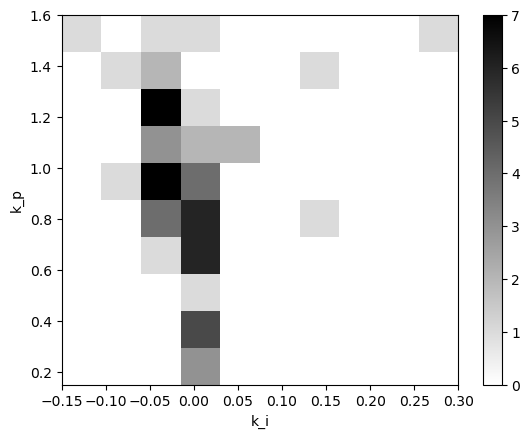

In [196]:
plt.hist2d(_all_ki, _all_kp, cmap='binary')
plt.xlabel('k_i')
plt.ylabel('k_p')
plt.colorbar()
plt.savefig('all_years_ivp_hist.png', dpi=300)
plt.show()

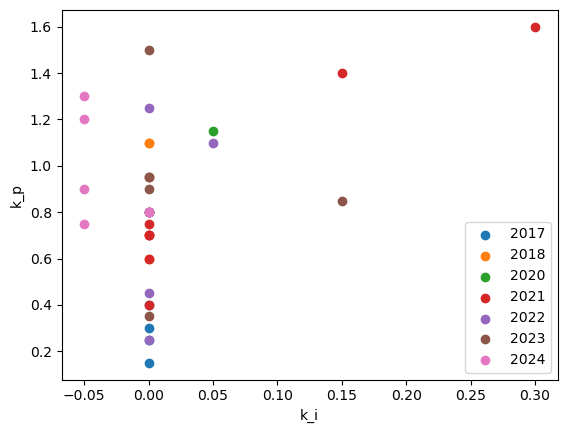

In [344]:
plt.scatter(_2017_sub_ki, _2017_sub_kp, label='2017')
plt.scatter(_2018_sub_ki, _2018_sub_kp, label='2018')
plt.scatter(_2020_sub_ki, _2020_sub_kp, label='2020')
plt.scatter(_2021_sub_ki, _2021_sub_kp, label='2021')
plt.scatter(_2022_sub_ki, _2022_sub_kp, label='2022')
plt.scatter(_2023_sub_ki, _2023_sub_kp, label='2023')
plt.scatter(_2024_sub_ki, _2024_sub_kp, label='2024')
plt.xlabel('k_i')
plt.ylabel('k_p')
plt.legend()
plt.savefig('all_years_sub_ivp.png', dpi=300)
plt.show()

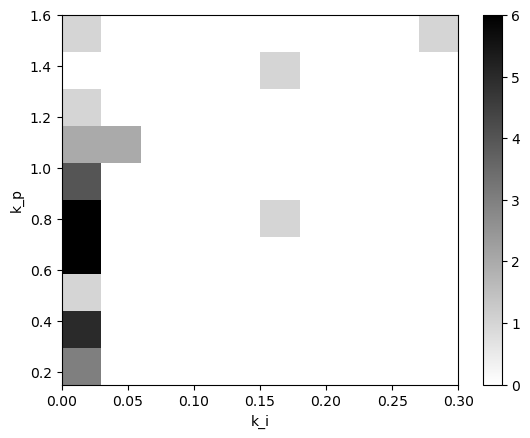

In [345]:
plt.hist2d(_all_sub_ki, _all_sub_kp, cmap='binary')
plt.xlabel('k_i')
plt.ylabel('k_p')
plt.colorbar()
plt.savefig('all_years_sub_ivp_hist.png', dpi=300)
plt.show()